In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Sobel이랑 Canny를 섞어서 카드의 경계값을 찾아보려고 했는데 x축에 soble을 입혀도 스페이드5를 제대로 분류하지 못하네...<br>
**그리고 sobel을 입히면 카드 외각을 못찾음<br><br>
원본, soble 적용, soble+canny, contour(못찾으니까 의미는 없지)

In [3]:
img = cv2.imread('cards_new.jpg')
im_bw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

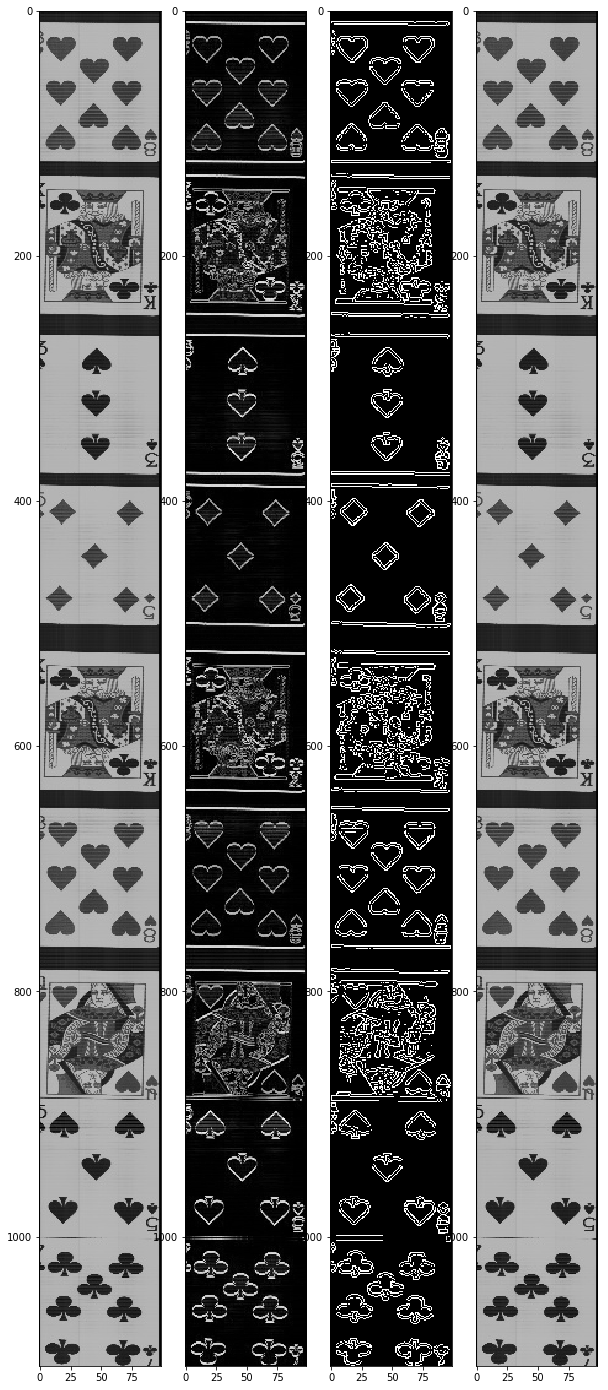

In [5]:
img_sobel_x = cv2.Sobel(im_bw, cv2.CV_64F, 0, 1, ksize=1)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)
edge3 = cv2.Canny(img_sobel_x, 170, 200)
f = plt.figure(figsize=(10,30))
ax = f.add_subplot(141)
ax2 = f.add_subplot(142)
ax3 = f.add_subplot(143)
ax4 = f.add_subplot(144)

contours, hierarchy = cv2.findContours(edge3.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(each) for each in contours]
rects2 = [(x,y,w,h) for (x,y,w,h) in rects if ((w>=95)&(w<=100)&(h>=113)&(h<=117))]
# rects2 = [(x,y,w,h) for (x,y,w,h) in rects if ((w>=50)&(w<=50)&(h>=50)&(h<=50))]
imgimg=img.copy()
for rect in rects2:
    # Draw the rectangles
    cv2.rectangle(imgimg, (rect[0], rect[1]), 
                  (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 5) 

ax.imshow(img)
ax2.imshow(img_sobel_x, cmap='gray')
ax3.imshow(edge3, cmap='gray')
ax4.imshow(imgimg)

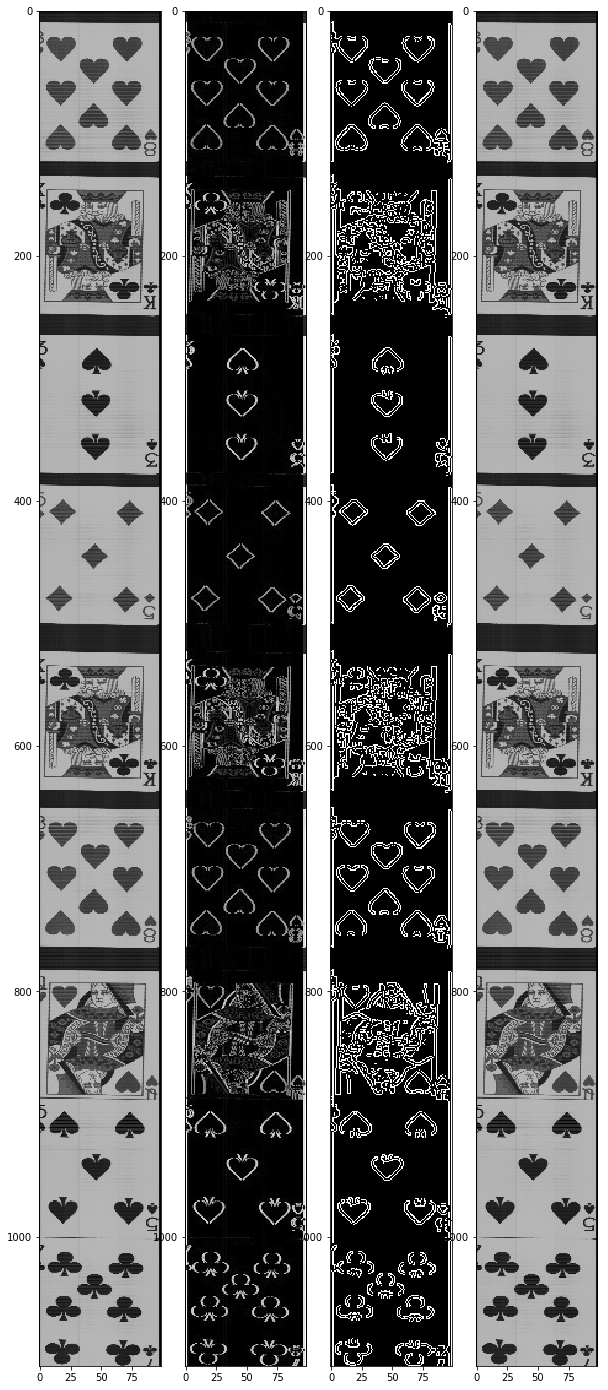

In [6]:
img_sobel_y = cv2.Sobel(im_bw, cv2.CV_64F, 1, 0, ksize=1)
img_sobel_y = cv2.convertScaleAbs(img_sobel_y)
edge3 = cv2.Canny(img_sobel_y, 170, 200)
f = plt.figure(figsize=(10,30))
ax = f.add_subplot(141)
ax2 = f.add_subplot(142)
ax3 = f.add_subplot(143)
ax4 = f.add_subplot(144)

contours, hierarchy = cv2.findContours(edge3.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(each) for each in contours]
rects2 = [(x,y,w,h) for (x,y,w,h) in rects if ((w>=95)&(w<=100)&(h>=113)&(h<=117))]
# rects2 = [(x,y,w,h) for (x,y,w,h) in rects if ((w>=50)&(w<=50)&(h>=50)&(h<=50))]
imgimg=img.copy()
for rect in rects2:
    # Draw the rectangles
    cv2.rectangle(imgimg, (rect[0], rect[1]), 
                  (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 5) 

ax.imshow(img)
ax2.imshow(img_sobel_y, cmap='gray')
ax3.imshow(edge3, cmap='gray')
ax4.imshow(imgimg)